# Phase 2, Composite Space (verb + noun)

In this experiment, we use the results of a noun vector space to enhance a verb space. This is done by adding the similarity value of all similar terms of a given basis word. The similarity values are normalized so that the total value is no greater than 1. This distributes the meaning of the co-occurring word across all of its similar terms. 

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.experiments import CompositeVerb
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_composite_space', version='c')

This is Text-Fabric 3.4.12
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API 3.4.12</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

#### Load the Noun Space

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)
print(f'noun experiment with dim {ne1.data.shape} ready...')
ns1 = SemSpace(ne1, info=True)

noun experiment with dim (6357, 2744) ready...
  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     1.52s Finished PPMI...
  1.52s Building pairwise matrices...
    34s space is ready!


#### Build Composite Experiment

In [3]:
indent(reset=True)
info('building composite experiment...')
ce1 = CompositeVerb(ns1.sim_pmi_normalized, tf_api=tf_api) 
info(f'composite experiment with dim {ce1.data.shape} ready...')

  0.00s building composite experiment...
 1m 00s composite experiment with dim (348488, 794) ready...


### Build Composite Space
This may take some time.

In [ ]:
cs1 = SemSpace(ce1, info=True)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |       32s Finished PPMI...
    32s Building pairwise matrices...


## Visualize Space

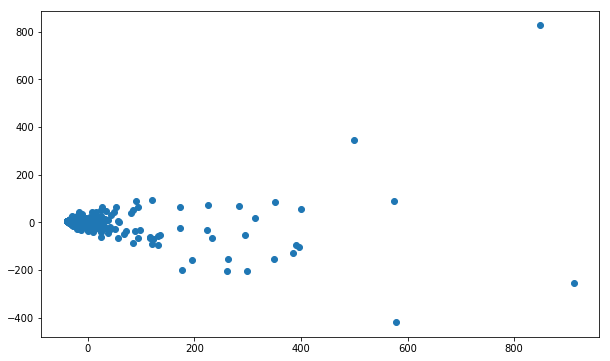

In [17]:
cs1.pmi_plot.show(annotate=False)

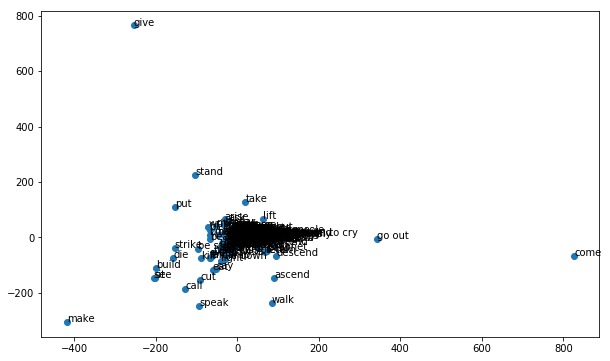

In [26]:
cs1.pmi_plot.show(principal_components=[1, 2])

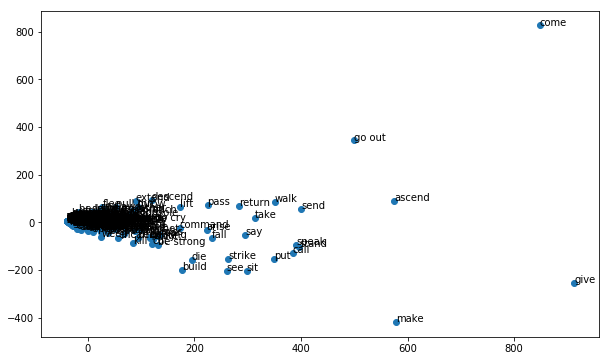

In [20]:
cs1.pmi_plot.show()

In [23]:
cs1.similarity_pmi['>MR[ (say)'].sort_values(ascending=False).head(10)

>MR[ (say)            1.000000
KWN[ (be firm)        0.403258
QR>[ (call)           0.386092
NGD[ (report)         0.378435
DBR[ (speak)          0.348949
<FH[ (make)           0.337380
BNH[ (build)          0.334613
CLX[ (send)           0.325326
YLL==[ (grow dark)    0.322304
QHL[ (assemble)       0.313881
Name: >MR[ (say), dtype: float64

In [24]:
cs1.similarity_pmi['<FH[ (make)'].sort_values(ascending=False).head(10)

<FH[ (make)     1.000000
QR>[ (call)     0.407209
DBR[ (speak)    0.390012
KRT[ (cut)      0.359815
NTN[ (give)     0.353935
KTB[ (write)    0.345204
>MR[ (say)      0.337380
MWT[ (die)      0.334927
>KL[ (eat)      0.325965
BNH[ (build)    0.324294
Name: <FH[ (make), dtype: float64

## Attempt Clustering

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.nan_to_num(cs1.pairwise_pmi, 0))
cluster_1_count = kmeans.labels_[kmeans.labels_ == 0].shape[0]
cluster_2_count = kmeans.labels_[kmeans.labels_ == 1].shape[0]

print(f'cluster_1 size: {cluster_1_count} ({round(cluster_1_count / kmeans.labels_.shape[0], 3)})')
print(f'cluster_2 size: {cluster_2_count} ({round(cluster_2_count / kmeans.labels_.shape[0], 3)})')

cluster_1 size: 148 (0.274)
cluster_2 size: 393 (0.726)


In [42]:
cglossedmin = pd.DataFrame(kmeans.labels_, 
                           index=[f'{F.lex.v(ce1.target2lex[w])} -- {ce1.target2gloss[w]}' for w in cs1.pmi.columns], 
                           columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=cs1.pmi.columns, 
                        columns=['cluster']).fillna(0)

cglossedmin[cglossedmin.cluster == 0]

,cluster
"<BD[ -- work, serve",0
<BR[ -- pass,0
<FH[ -- make,0
<LH[ -- ascend,0
<MD[ -- stand,0
<NH=[ -- be lowly,0
<RK[ -- arrange,0
<ZB[ -- leave,0
<ZZ[ -- be strong,0
>BL[ -- mourn,0


In [43]:
cglossedmin[cglossedmin.cluster == 1]

,cluster
<BR=[ -- be angry,1
<DR[ -- be missing,1
<GB[ -- desire,1
<JV[ -- rebuke,1
<LL[ -- deal with,1
<NH[ -- answer,1
<QD[ -- bind,1
<QR[ -- root up,1
<RH[ -- pour out,1
<TD[ -- prepare,1
